In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Alzheimer

In [2]:
alz_classif = pd.read_excel('summary_results_all.xlsx', sheet_name='alzheimer classif')
alz_classif

,model name,valid/mcc_mean,valid/mcc_std,test/mcc_mean,test/mcc_std,valid/acc_mean,valid/acc_std,test/acc_mean,test/acc_std,valid/auc_mean,...,test/auc_mean,test/auc_std,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,qc_aPCC mean,qc_dist/total_dist mean,batch_entropy mean,valid/mcc_mean.1
0,raw,0.220000,0.110000,0.240000,0.180000,0.600000,0.090000,0.610000,0.100000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,0.653097,1.049893,1.973757,0.220000
1,minmax,0.150000,0.080000,0.220000,0.110000,0.540000,0.030000,0.600000,0.060000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,0.554029,0.955373,1.952406,0.150000
2,minmax_per_batch,0.190000,0.090000,0.170000,0.110000,0.550000,0.040000,0.570000,0.080000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,0.171413,3.261474,1.999605,0.190000
3,standard,0.220000,0.090000,0.260000,0.100000,0.580000,0.040000,0.620000,0.060000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,0.328629,0.822470,1.968121,0.220000
4,standard_per_batch,0.150000,0.050000,0.250000,0.070000,0.540000,0.050000,0.610000,0.050000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,0.225515,3.582448,2.242627,0.150000
5,robust,0.260000,0.130000,0.180000,0.160000,0.580000,0.030000,0.580000,0.060000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,0.195190,1.137376,1.946204,0.260000
6,robust_per_batch,0.120000,0.070000,0.190000,0.060000,0.530000,0.030000,0.580000,0.050000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,0.196446,1.747916,2.196456,0.120000
7,combat,0.100000,0.140000,0.230000,0.050000,0.540000,0.060000,0.620000,0.040000,NaN,...,NaN,NaN,linsvc,NaN,NaN,NaN,-0.018158,0.958292,2.337022,0.100000
8,pycombat,0.170000,0.110000,0.230000,0.140000,0.620000,0.040000,0.590000,0.090000,NaN,...,NaN,NaN,rfc,NaN,NaN,NaN,0.772163,0.871237,2.073872,0.170000
9,harmony,0.170000,0.150000,0.050000,0.150000,0.510000,0.140000,0.510000,0.150000,NaN,...,NaN,NaN,rfc,NaN,NaN,NaN,0.034320,0.765994,2.357266,0.170000


In [3]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((alz_classif['valid/mcc_mean'], alz_classif['test/mcc_mean'])),
    "sd" : pd.concat((alz_classif['valid/mcc_std'], alz_classif['test/mcc_std'])),
    "models": pd.concat((alz_classif['model name'], alz_classif['model name'])),
    "group": ['valid' for _ in range(len(alz_classif['model name']))] + ['test' for _ in range(len(alz_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": alz_classif['valid/mcc_mean'],
    "sd" : alz_classif['valid/mcc_std'],
    "models": alz_classif['model name'],
    "group": ['valid' for _ in range(len(alz_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": alz_classif['test/mcc_mean'],
    "sd" : alz_classif['test/mcc_std'],
    "models": alz_classif['model name'],
    "group": ['test' for _ in range(len(alz_classif['model name']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

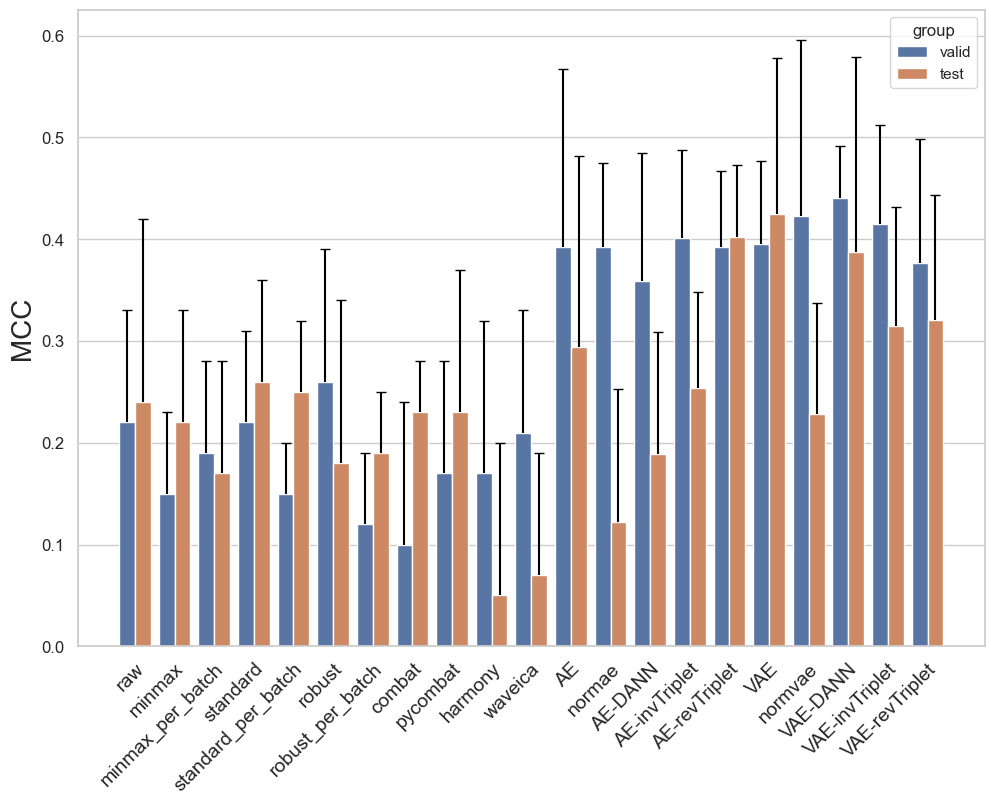

In [4]:
N = len(alz_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['mcc'], lolims=lolims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['mcc'], lolims=lolims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("MCC",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [5]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((alz_classif['valid/acc_mean'], alz_classif['test/acc_mean'])),
    "sd" : pd.concat((alz_classif['valid/acc_std'], alz_classif['test/acc_std'])),
    "models": pd.concat((alz_classif['model name'], alz_classif['model name'])),
    "group": ['valid' for _ in range(len(alz_classif['model name']))] + ['test' for _ in range(len(alz_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": alz_classif['valid/acc_mean'],
    "sd" : alz_classif['valid/acc_std'],
    "models": alz_classif['model name'],
    "group": ['valid' for _ in range(len(alz_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": alz_classif['test/acc_mean'],
    "sd" : alz_classif['test/acc_std'],
    "models": alz_classif['model name'],
    "group": ['test' for _ in range(len(alz_classif['model name']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

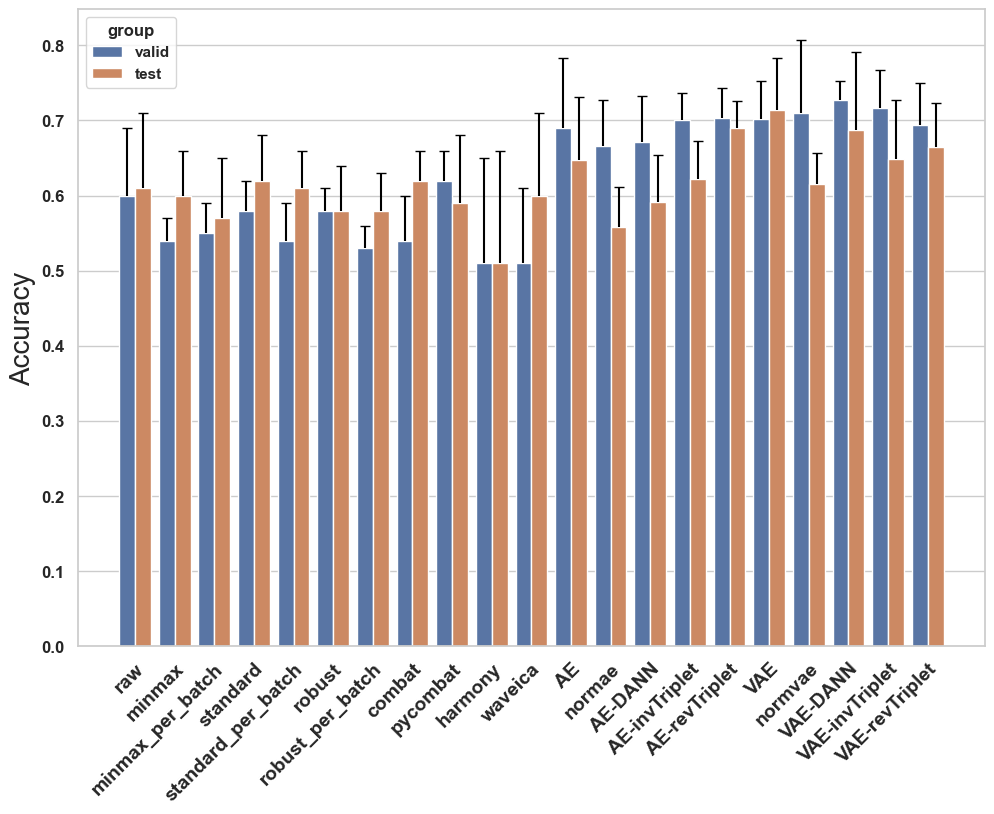

In [6]:
N = len(alz_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['acc'], lolims=lolims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['acc'], lolims=lolims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Accuracy",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

# Amide

In [7]:
amide_classif = pd.read_excel('summary_results.xlsx', sheet_name='amide classif')
amide_classif

,model name,valid/mcc_mean,valid/mcc_std,test/mcc_mean,test/mcc_std,valid/acc_mean,valid/acc_std,test/acc_mean,test/acc_std,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,qc_aPCC mean,qc_dist/total_dist mean,batch_entropy mean,valid/mcc_mean.1
0,raw,0.130000,0.090000,0.000000,0.000000,0.880000,0.000000,0.880000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.815415,0.838954,0.000000,0.130000
1,minmax,0.080000,0.050000,0.040000,0.030000,0.880000,0.000000,0.870000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,0.480164,0.902304,0.000000,0.080000
2,minmax_per_batch,0.000000,0.000000,0.000000,0.000000,0.880000,0.000000,0.880000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.325926,0.967037,0.000349,0.000000
3,standard,0.120000,0.000000,0.010000,0.040000,0.280000,0.050000,0.190000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,0.182790,0.913505,0.000000,0.120000
4,standard_per_batch,0.090000,0.020000,0.140000,0.090000,0.640000,0.010000,0.600000,0.060000,NaN,NaN,NaN,NaN,NaN,NaN,0.239696,0.961342,0.404963,0.090000
5,robust,0.110000,0.060000,0.090000,0.080000,0.420000,0.050000,0.440000,0.110000,NaN,NaN,NaN,NaN,NaN,NaN,0.310263,0.881791,0.011446,0.110000
6,robust_per_batch,0.130000,0.020000,0.080000,0.030000,0.790000,0.010000,0.760000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,0.360971,1.035938,0.541351,0.130000
7,combat,0.110000,0.110000,0.130000,0.090000,0.880000,0.100000,0.880000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.008655,1.181689,0.891550,0.110000
8,pycombat,0.060000,0.090000,-0.020000,0.010000,0.880000,0.000000,0.870000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.943080,0.793879,0.321259,0.060000
9,harmony,0.170000,0.150000,0.050000,0.150000,0.550000,0.090000,0.510000,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,0.178618,0.995316,0.575718,0.170000


In [8]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((amide_classif['valid/mcc_mean'], amide_classif['test/mcc_mean'])),
    "sd" : pd.concat((amide_classif['valid/mcc_std'], amide_classif['test/mcc_std'])),
    "models": pd.concat((amide_classif['model name'], amide_classif['model name'])),
    "group": ['valid' for _ in range(len(amide_classif['model name']))] + ['test' for _ in range(len(amide_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['valid/mcc_mean'],
    "sd" : amide_classif['valid/mcc_std'],
    "models": amide_classif['model name'],
    "group": ['valid' for _ in range(len(amide_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['test/mcc_mean'],
    "sd" : amide_classif['test/mcc_std'],
    "models": amide_classif['model name'],
    "group": ['test' for _ in range(len(amide_classif['model name']))]
})


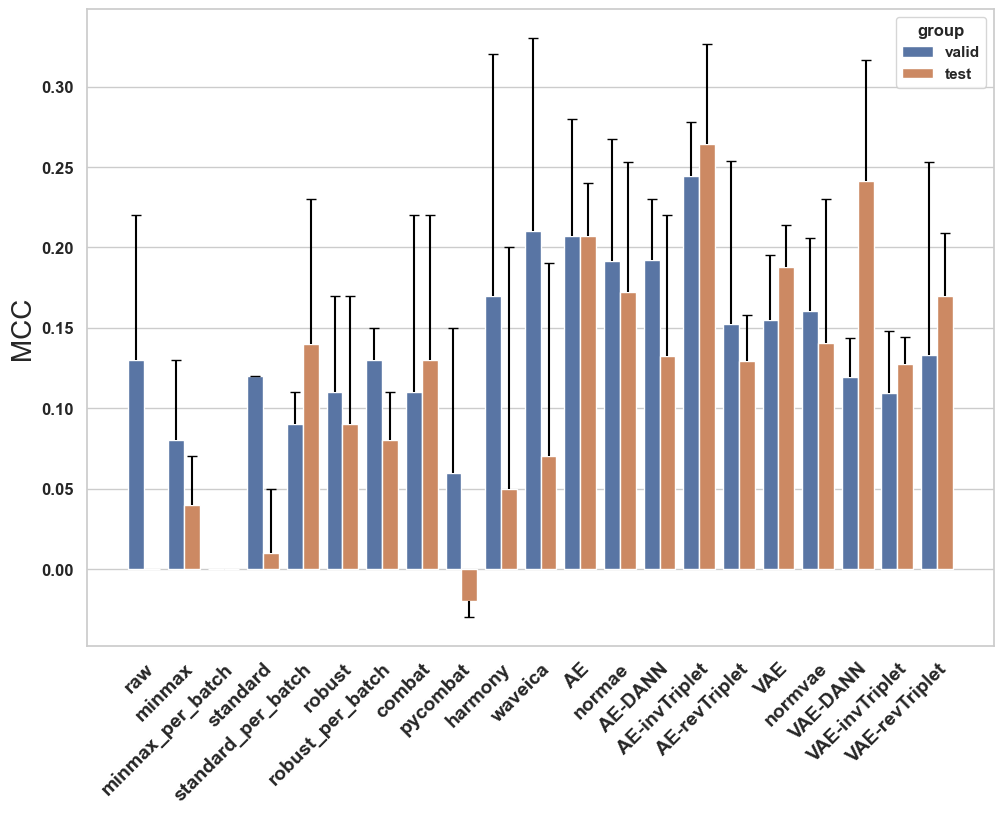

In [9]:
N = len(amide_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

lolims = [True if v > 0 else False for v in df_valid['mcc']]
uplims = [True if v < 0 else False for v in df_valid['mcc']]
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['mcc'], lolims=lolims, uplims=uplims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
lolims = [True if v > 0 else False for v in df_test['mcc']]
uplims = [True if v < 0 else False for v in df_test['mcc']]
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['mcc'], lolims=lolims, uplims=uplims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("MCC",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

In [10]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((amide_classif['valid/acc_mean'], amide_classif['test/acc_mean'])),
    "sd" : pd.concat((amide_classif['valid/acc_std'], amide_classif['test/acc_std'])),
    "models": pd.concat((amide_classif['model name'], amide_classif['model name'])),
    "group": ['valid' for _ in range(len(amide_classif['model name']))] + ['test' for _ in range(len(amide_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['valid/acc_mean'],
    "sd" : amide_classif['valid/acc_std'],
    "models": amide_classif['model name'],
    "group": ['valid' for _ in range(len(amide_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['test/acc_mean'],
    "sd" : amide_classif['test/acc_std'],
    "models": amide_classif['model name'],
    "group": ['test' for _ in range(len(amide_classif['model name']))]
})


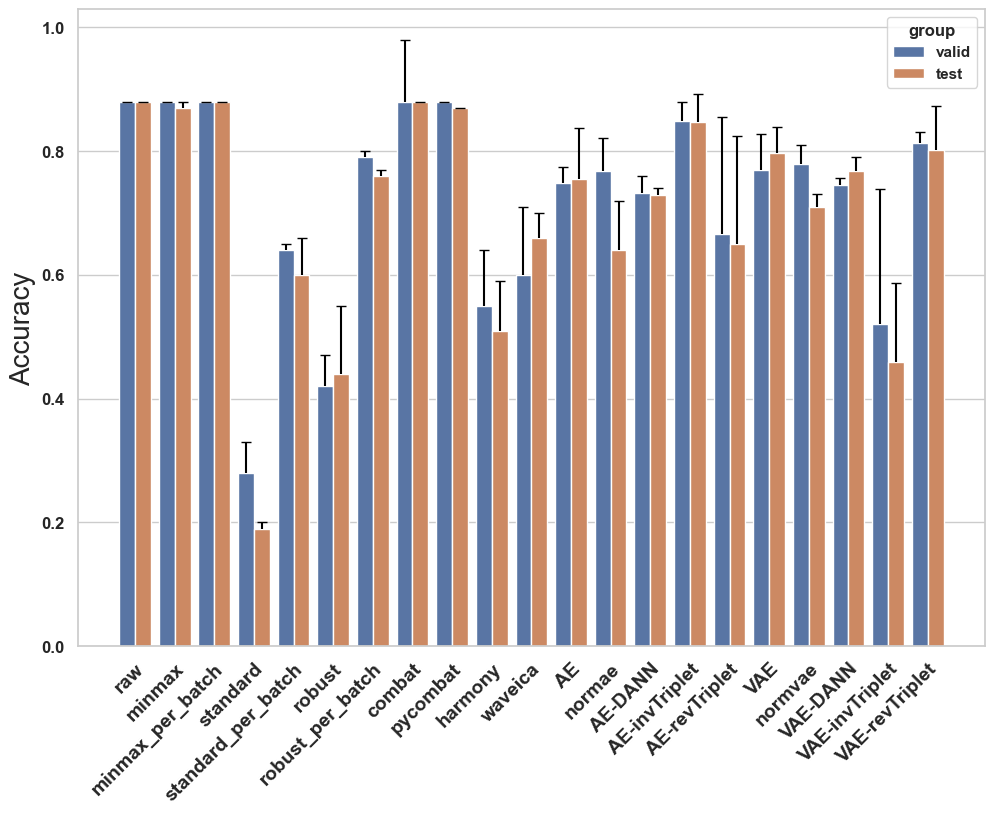

In [11]:
N = len(amide_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

lolims = [True if v > 0 else False for v in df_valid['acc']]
uplims = [True if v < 0 else False for v in df_valid['acc']]
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['acc'], lolims=lolims, uplims=uplims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
lolims = [True if v > 0 else False for v in df_test['acc']]
uplims = [True if v < 0 else False for v in df_test['acc']]
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['acc'], lolims=lolims, uplims=uplims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Accuracy",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

# Mice

In [12]:
amide_classif = pd.read_excel('summary_results.xlsx', sheet_name='mice classif')
amide_classif

,model name,valid/mcc_mean,valid/mcc_std,test/mcc_mean,test/mcc_std,valid/acc_mean,valid/acc_std,test/acc_mean,test/acc_std,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,batch_entropy mean,valid/mcc_mean.1
0,raw,0.920000,0.060000,0.920000,0.050000,0.960000,0.030000,0.970000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.242797,0.920000
1,minmax,0.940000,0.030000,0.920000,0.050000,0.970000,0.030000,0.960000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235326,0.940000
2,minmax_per_batch,0.930000,0.050000,0.870000,0.090000,0.970000,0.020000,0.940000,0.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.244941,0.930000
3,standard,0.920000,0.050000,0.910000,0.050000,0.960000,0.030000,0.960000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.362665,0.920000
4,standard_per_batch,0.920000,0.050000,0.880000,0.100000,0.960000,0.030000,0.950000,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.171385,0.920000
5,robust,0.890000,0.050000,0.940000,0.080000,0.950000,0.030000,0.970000,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.528497,0.890000
6,robust_per_batch,0.830000,0.040000,0.770000,0.140000,0.920000,0.020000,0.880000,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476775,0.830000
7,combat,0.050000,0.170000,0.130000,0.160000,0.510000,0.050000,0.580000,0.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.495775,0.050000
8,pycombat,0.920000,0.060000,0.900000,0.080000,0.960000,0.030000,0.960000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.270220,0.920000
9,harmony,0.130000,0.080000,0.100000,0.040000,0.570000,0.050000,0.570000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.800588,0.130000


In [13]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((amide_classif['valid/mcc_mean'], amide_classif['test/mcc_mean'])),
    "sd" : pd.concat((amide_classif['valid/mcc_std'], amide_classif['test/mcc_std'])),
    "models": pd.concat((amide_classif['model name'], amide_classif['model name'])),
    "group": ['valid' for _ in range(len(amide_classif['model name']))] + ['test' for _ in range(len(amide_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['valid/mcc_mean'],
    "sd" : amide_classif['valid/mcc_std'],
    "models": amide_classif['model name'],
    "group": ['valid' for _ in range(len(amide_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": amide_classif['test/mcc_mean'],
    "sd" : amide_classif['test/mcc_std'],
    "models": amide_classif['model name'],
    "group": ['test' for _ in range(len(amide_classif['model name']))]
})


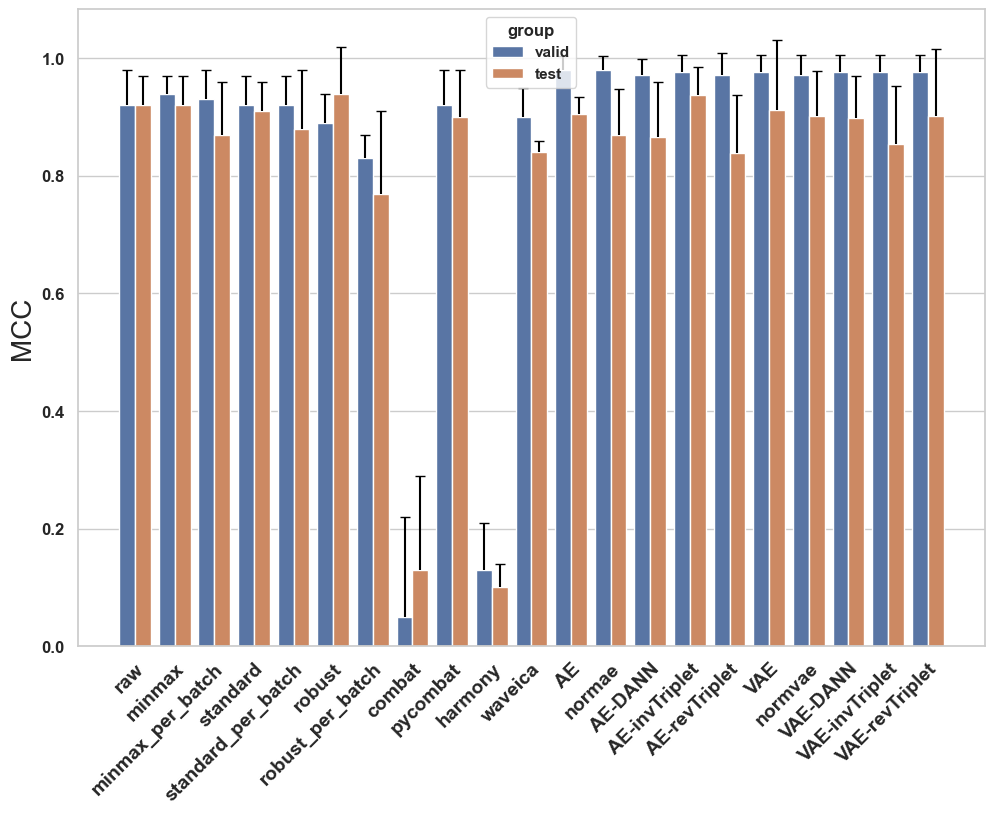

In [14]:
N = len(amide_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="mcc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

lolims = [True if v > 0 else False for v in df_valid['mcc']]
uplims = [True if v < 0 else False for v in df_valid['mcc']]
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['mcc'], lolims=lolims, uplims=uplims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
lolims = [True if v > 0 else False for v in df_test['mcc']]
uplims = [True if v < 0 else False for v in df_test['mcc']]
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['mcc'], lolims=lolims, uplims=uplims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("MCC",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)

plt.show()

In [15]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((amide_classif['valid/acc_mean'], amide_classif['test/acc_mean'])),
    "sd" : pd.concat((amide_classif['valid/acc_std'], amide_classif['test/acc_std'])),
    "models": pd.concat((amide_classif['model name'], amide_classif['model name'])),
    "group": ['valid' for _ in range(len(amide_classif['model name']))] + ['test' for _ in range(len(amide_classif['model name']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['valid/acc_mean'],
    "sd" : amide_classif['valid/acc_std'],
    "models": amide_classif['model name'],
    "group": ['valid' for _ in range(len(amide_classif['model name']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": amide_classif['test/acc_mean'],
    "sd" : amide_classif['test/acc_std'],
    "models": amide_classif['model name'],
    "group": ['test' for _ in range(len(amide_classif['model name']))]
})


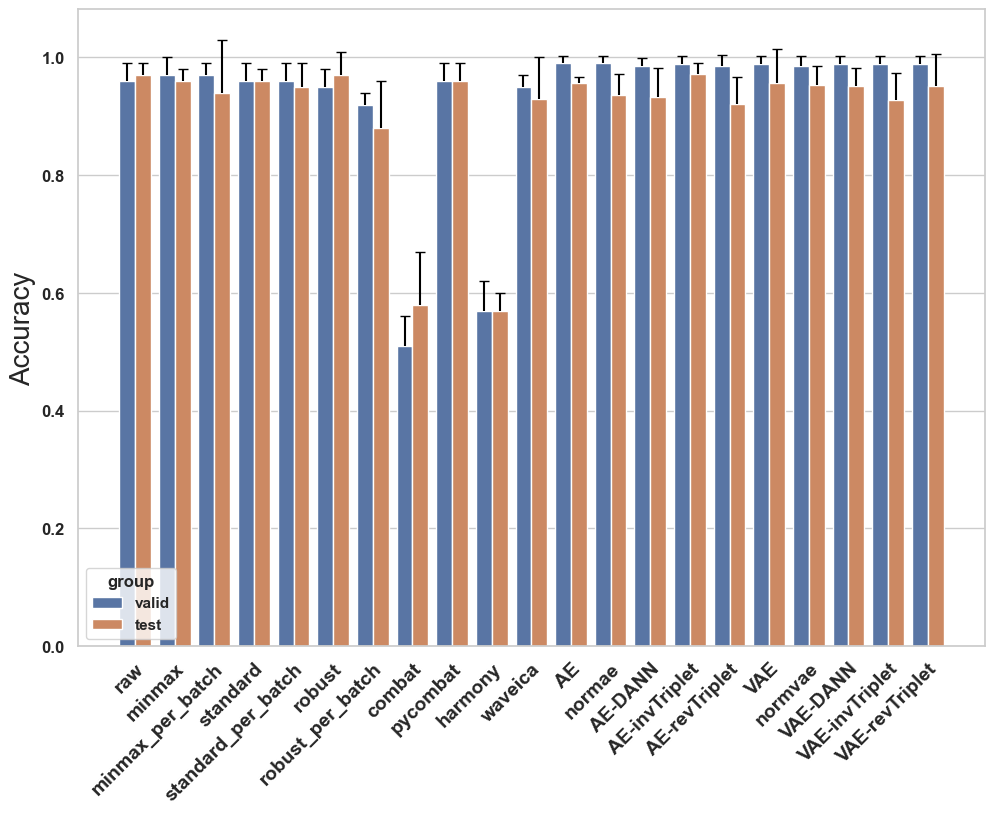

In [16]:
N = len(amide_classif['model name'])
width = 0.2
ind = np.arange(N)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y="acc", data=df, ci=None, hue='group',
            # order=order
           )
g.set_xticklabels(rotation=90, labels=df_valid['models'])

lolims = [True if v > 0 else False for v in df_valid['acc']]
uplims = [True if v < 0 else False for v in df_valid['acc']]
plotline, caplines, barlinecols = g.errorbar(x = ind-width, y = df_valid['acc'], lolims=lolims, uplims=uplims,
            yerr=df_valid['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
lolims = [True if v > 0 else False for v in df_test['acc']]
uplims = [True if v < 0 else False for v in df_test['acc']]
plotline, caplines, barlinecols = g.errorbar(x = ind+width, y = df_test['acc'], lolims=lolims, uplims=uplims,
            yerr=df_test['sd'], fmt='none', c= 'black', capsize = 0)

# [arrow] -> [-]
for capline in caplines:
    capline.set_marker('_')
    capline.set_markersize(7)
    
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("Accuracy",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=14)
plt.yticks(fontsize=12)

plt.show()